In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/gene expression cancer RNA-Seq Data Set/data.csv")

In [ ]:
data1=pd.read_csv("/content/drive/MyDrive/gene expression cancer RNA-Seq Data Set/labels.csv")

In [ ]:
data['Class']=data1['Class']

In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
X=data.iloc[:,0:20531]
y=data.iloc[:,-1]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [ ]:
data['Class'].value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

            Specs        Score
9176    gene_9176  8580.566498
9175    gene_9175  7363.380532
15898  gene_15898  6902.074640
220      gene_220  6333.703681
219      gene_219  6259.461507
15896  gene_15896  6167.421060
18135  gene_18135  6068.309487
15899  gene_15899  6060.031639
12069  gene_12069  6057.465466
15895  gene_15895  5993.573219
13976  gene_13976  5784.707717
16132  gene_16132  5678.660643
12995  gene_12995  5607.494517
3439    gene_3439  5267.251896
19153  gene_19153  5210.506981
5829    gene_5829  5169.020002
450      gene_450  5164.083569
16169  gene_16169  5074.756132
15591  gene_15591  4984.815446
11903  gene_11903  4978.029220


In [ ]:
df=data.iloc[:,[9176,9175,15898,220,219,15896,18135,15899,12069,15895,13976,16132,12995,3439,19153,5829,450,16169,15591,1190,-1]]
df

,gene_9176,gene_9175,gene_15898,gene_220,gene_219,gene_15896,gene_18135,gene_15899,gene_12069,gene_15895,...,gene_16132,gene_12995,gene_3439,gene_19153,gene_5829,gene_450,gene_16169,gene_15591,gene_1190,Class
0,18.525161,17.173570,1.334282,0.591871,0.591871,0.591871,6.878308,0.000000,4.692126,0.000000,...,0.000000,13.186662,3.266292,1.010279,0.000000,0.000000,3.478079,0.000000,7.031572,PRAD
1,0.000000,0.000000,13.609213,0.000000,0.000000,13.532125,0.000000,12.695983,0.000000,10.068832,...,0.000000,0.000000,0.323658,0.000000,0.000000,0.000000,0.000000,6.555574,8.786832,LUAD
2,16.053597,14.818422,1.074163,0.452595,0.000000,1.074163,12.900029,0.000000,14.766151,0.000000,...,0.452595,3.000252,0.000000,0.000000,2.785739,0.000000,0.000000,0.000000,5.388975,PRAD
3,18.371794,17.371079,0.434882,0.434882,1.039419,4.216416,13.907304,0.000000,8.653719,0.000000,...,0.000000,14.465586,0.000000,0.768587,1.464093,0.000000,0.768587,0.000000,8.317494,PRAD
4,0.000000,1.580097,1.095654,0.000000,0.000000,0.360982,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.360982,0.000000,0.000000,0.000000,0.360982,0.649386,0.000000,8.571768,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,1.611739,1.955573,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.496922,0.000000,...,0.000000,1.159435,0.000000,0.000000,0.000000,0.865919,0.865919,0.000000,9.928974,BRCA
797,0.000000,0.618051,18.640513,0.000000,0.000000,16.084458,0.000000,6.997044,0.000000,12.005982,...,0.618051,0.000000,1.049282,0.000000,0.000000,0.000000,0.000000,4.616440,5.850112,LUAD
798,4.812406,3.648673,1.325099,0.000000,1.002595,0.586693,3.911778,0.000000,3.092089,4.677458,...,1.002595,0.000000,8.309003,4.911955,11.518225,0.000000,0.000000,0.000000,8.814191,COAD
799,18.166516,16.418269,2.577175,0.000000,0.000000,0.000000,12.741256,0.000000,16.649719,3.239566,...,0.995304,5.294672,0.000000,0.000000,0.581881,0.000000,1.578746,0.000000,7.854881,PRAD


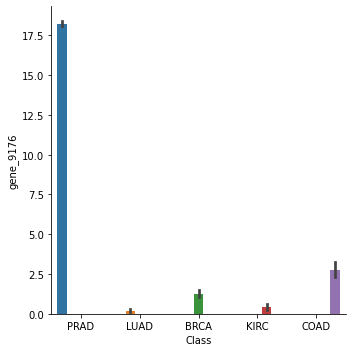

In [ ]:

sns.catplot(data=df, x="Class", y="gene_9176", hue="Class", kind="bar")

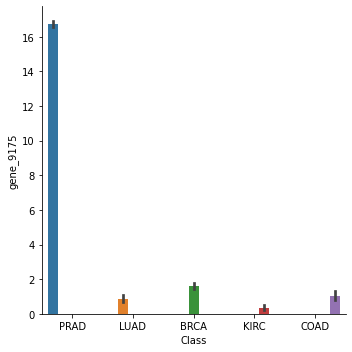

In [ ]:

sns.catplot(data=df, x="Class", y="gene_9175", hue="Class", kind="bar")

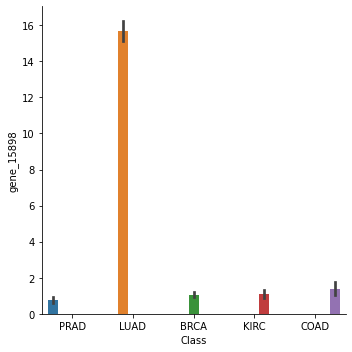

In [ ]:

sns.catplot(data=df, x="Class", y="gene_15898", hue="Class", kind="bar")

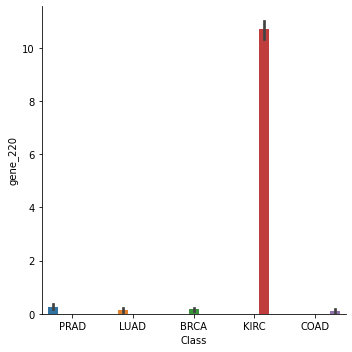

In [ ]:

sns.catplot(data=df, x="Class", y="gene_220", hue="Class", kind="bar")

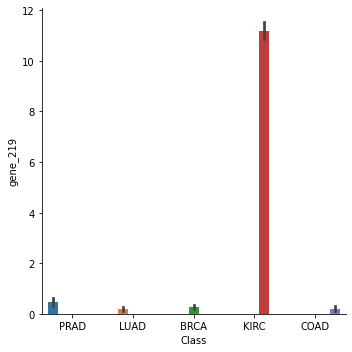

In [ ]:

sns.catplot(data=df, x="Class", y="gene_219", hue="Class", kind="bar")

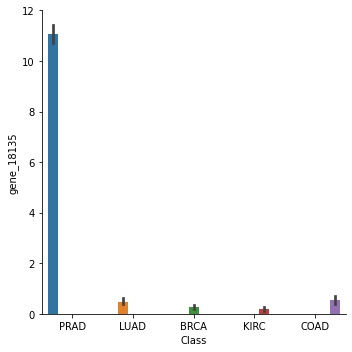

In [ ]:

sns.catplot(data=df, x="Class", y="gene_18135", hue="Class", kind="bar")

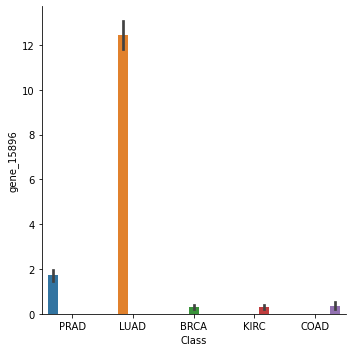

In [ ]:

sns.catplot(data=df, x="Class", y="gene_15896", hue="Class", kind="bar")

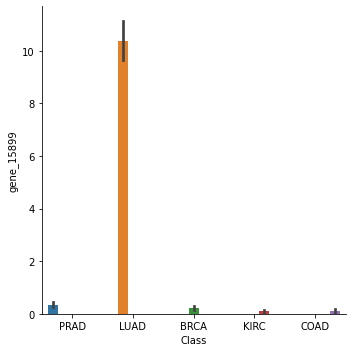

In [ ]:

sns.catplot(data=df, x="Class", y="gene_15899", hue="Class", kind="bar")

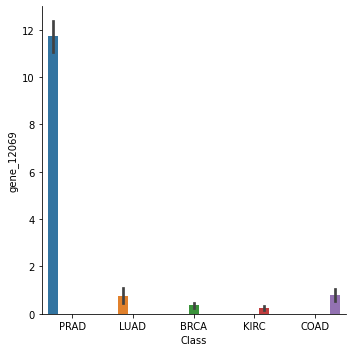

In [ ]:

sns.catplot(data=df, x="Class", y="gene_12069", hue="Class", kind="bar")

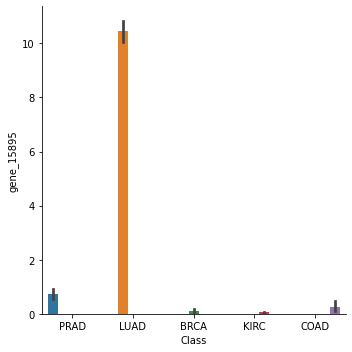

In [ ]:

sns.catplot(data=df, x="Class", y="gene_15895", hue="Class", kind="bar")

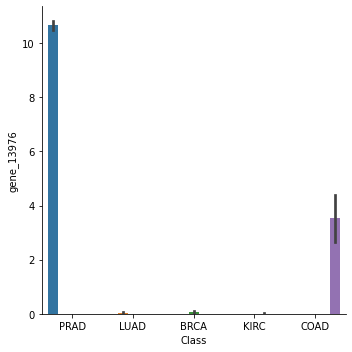

In [ ]:

sns.catplot(data=df, x="Class", y="gene_13976", hue="Class", kind="bar")

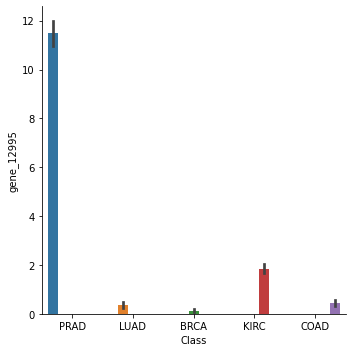

In [ ]:

sns.catplot(data=df, x="Class", y="gene_12995", hue="Class", kind="bar")

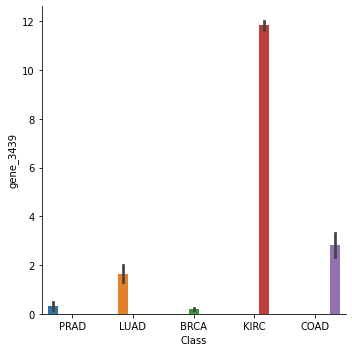

In [ ]:

sns.catplot(data=df, x="Class", y="gene_3439", hue="Class", kind="bar")

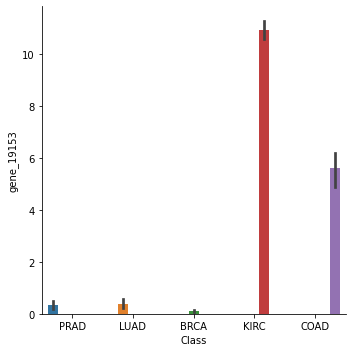

In [ ]:

sns.catplot(data=df, x="Class", y="gene_19153", hue="Class", kind="bar")

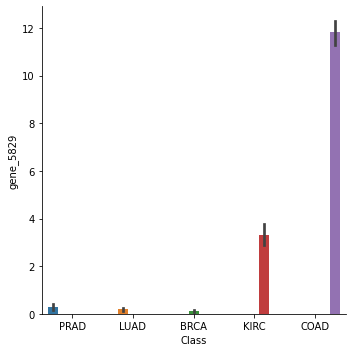

In [ ]:

sns.catplot(data=df, x="Class", y="gene_5829", hue="Class", kind="bar")

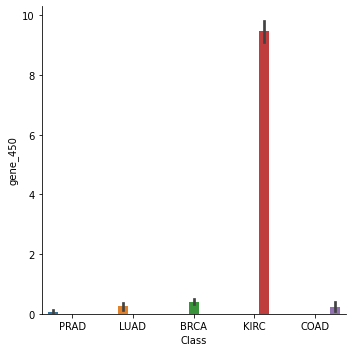

In [ ]:

sns.catplot(data=df, x="Class", y="gene_450", hue="Class", kind="bar")

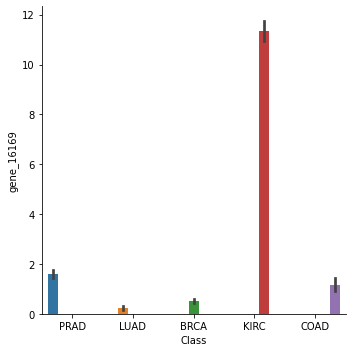

In [ ]:

sns.catplot(data=df, x="Class", y="gene_16169", hue="Class", kind="bar")

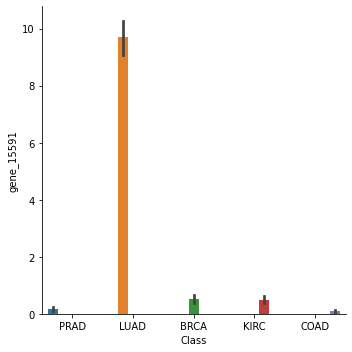

In [ ]:

sns.catplot(data=df, x="Class", y="gene_15591", hue="Class", kind="bar")

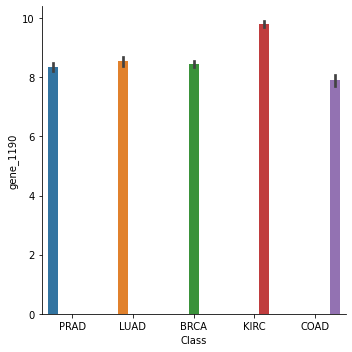

In [ ]:

sns.catplot(data=df, x="Class", y="gene_1190", hue="Class", kind="bar")

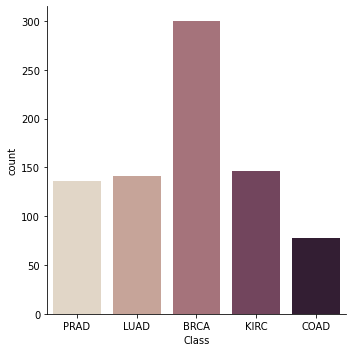

In [ ]:
sns.catplot(data=df, x="Class", kind="count", palette="ch:.25")

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Class']= label_encoder.fit_transform(df['Class'])
df['Class'].unique()

<ipython-input-45-a102804cd712>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class']= label_encoder.fit_transform(df['Class'])


array([4, 3, 0, 2, 1])

In [ ]:
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X=df.iloc[:,0:20]
y=df.iloc[:,-1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print("X Training data shape: ",X_train.shape)
print("X Testing data shape: ",X_test.shape)
print("y Training data shape: ",y_train.shape)
print("y Testing data shape: ",y_test.shape)

X Training data shape:  (560, 20)
X Testing data shape:  (241, 20)
y Training data shape:  (560,)
y Testing data shape:  (241,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train,y_train)
dec_tree_y_pred = dec_tree.predict(X_train)
print("Accuracy: {}".format(dec_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=dec_tree_y_pred)))

Accuracy: 1.0
R squared: 1.0


In [ ]:
dec_tree_y_pred = dec_tree.predict(X_test)
print("Accuracy: {}".format(dec_tree.score(X_test,y_test)))
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=dec_tree_y_pred)))

Accuracy: 0.9631385744876109
R squared: 0.9631385744876109


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train,y_train)
rf_tree_y_pred = rf_tree.predict(X_train)
print("Accuracy: {}".format(rf_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

Accuracy: 0.9945343592785431
R squared: 0.9945343592785431


In [ ]:
rf_tree_y_pred = rf_tree.predict(X_test)
print("Accuracy: {}".format(rf_tree.score(X_test,y_test)))
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=rf_tree_y_pred)))

Accuracy: 0.9926163054086731
R squared: 0.9926163054086731


In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train,y_train)
svr_y_pred = svr.predict(X_train)
print("Accuracy: {}".format(svr.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=svr_y_pred)))

Accuracy: 0.9699066976690411
R squared: 0.9699066976690411


In [ ]:
svr_y_pred = svr.predict(X_test)
print("Accuracy: {}".format(svr.score(X_test,y_test)))
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=svr_y_pred)))


Accuracy: 0.986122895296595
R squared: 0.986122895296595


In [ ]:
from sklearn.naive_bayes import GaussianNB  
classifier_nb = GaussianNB()  
classifier_nb.fit(X_train, y_train)  

GaussianNB()

In [ ]:
y_pred_nb = classifier_nb.predict(X_test)  

In [ ]:
nb=classifier_nb.predict(X_train)
accuracy_nb=accuracy_score(nb,y_train)*100
accuracy_nb

97.32142857142857

In [ ]:
accuracy_nb=accuracy_score(y_pred_nb,y_test)*100
print("Accuracy of the Decision Tree Classifier model is {:.2f}".format(accuracy_nb))

Accuracy of the Decision Tree Classifier model is 98.76


In [ ]:
classifier_knn = KNeighborsClassifier(n_neighbors=7)
  
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_knn=classifier_knn.predict(X_test)

In [ ]:
knn=classifier_knn.predict(X_train)
accuracy_knn=accuracy_score(knn,y_train)*100
accuracy_knn

98.21428571428571

In [ ]:
accuracy_knn=accuracy_score(y_pred_knn,y_test)*100
print("Accuracy of the knn Classifier model is {:.2f}".format(accuracy_knn))

Accuracy of the knn Classifier model is 99.17


In [ ]:
df.head()

,gene_9176,gene_9175,gene_15898,gene_220,gene_219,gene_15896,gene_18135,gene_15899,gene_12069,gene_15895,...,gene_16132,gene_12995,gene_3439,gene_19153,gene_5829,gene_450,gene_16169,gene_15591,gene_1190,Class
0,18.525161,17.173570,1.334282,0.591871,0.591871,0.591871,6.878308,0.000000,4.692126,0.000000,...,0.000000,13.186662,3.266292,1.010279,0.000000,0.000000,3.478079,0.000000,7.031572,4
1,0.000000,0.000000,13.609213,0.000000,0.000000,13.532125,0.000000,12.695983,0.000000,10.068832,...,0.000000,0.000000,0.323658,0.000000,0.000000,0.000000,0.000000,6.555574,8.786832,3
2,16.053597,14.818422,1.074163,0.452595,0.000000,1.074163,12.900029,0.000000,14.766151,0.000000,...,0.452595,3.000252,0.000000,0.000000,2.785739,0.000000,0.000000,0.000000,5.388975,4
3,18.371794,17.371079,0.434882,0.434882,1.039419,4.216416,13.907304,0.000000,8.653719,0.000000,...,0.000000,14.465586,0.000000,0.768587,1.464093,0.000000,0.768587,0.000000,8.317494,4
4,0.000000,1.580097,1.095654,0.000000,0.000000,0.360982,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.360982,0.000000,0.000000,0.000000,0.360982,0.649386,0.000000,8.571768,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gene_9176   801 non-null    float64
 1   gene_9175   801 non-null    float64
 2   gene_15898  801 non-null    float64
 3   gene_220    801 non-null    float64
 4   gene_219    801 non-null    float64
 5   gene_15896  801 non-null    float64
 6   gene_18135  801 non-null    float64
 7   gene_15899  801 non-null    float64
 8   gene_12069  801 non-null    float64
 9   gene_15895  801 non-null    float64
 10  gene_13976  801 non-null    float64
 11  gene_16132  801 non-null    float64
 12  gene_12995  801 non-null    float64
 13  gene_3439   801 non-null    float64
 14  gene_19153  801 non-null    float64
 15  gene_5829   801 non-null    float64
 16  gene_450    801 non-null    float64
 17  gene_16169  801 non-null    float64
 18  gene_15591  801 non-null    float64
 19  gene_1190   801 non-null    f

In [ ]:
df.head(5)

,gene_9176,gene_9175,gene_15898,gene_220,gene_219,gene_15896,gene_18135,gene_15899,gene_12069,gene_15895,...,gene_16132,gene_12995,gene_3439,gene_19153,gene_5829,gene_450,gene_16169,gene_15591,gene_1190,Class
0,18.525161,17.173570,1.334282,0.591871,0.591871,0.591871,6.878308,0.000000,4.692126,0.000000,...,0.000000,13.186662,3.266292,1.010279,0.000000,0.000000,3.478079,0.000000,7.031572,4
1,0.000000,0.000000,13.609213,0.000000,0.000000,13.532125,0.000000,12.695983,0.000000,10.068832,...,0.000000,0.000000,0.323658,0.000000,0.000000,0.000000,0.000000,6.555574,8.786832,3
2,16.053597,14.818422,1.074163,0.452595,0.000000,1.074163,12.900029,0.000000,14.766151,0.000000,...,0.452595,3.000252,0.000000,0.000000,2.785739,0.000000,0.000000,0.000000,5.388975,4
3,18.371794,17.371079,0.434882,0.434882,1.039419,4.216416,13.907304,0.000000,8.653719,0.000000,...,0.000000,14.465586,0.000000,0.768587,1.464093,0.000000,0.768587,0.000000,8.317494,4
4,0.000000,1.580097,1.095654,0.000000,0.000000,0.360982,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.360982,0.000000,0.000000,0.000000,0.360982,0.649386,0.000000,8.571768,0


In [ ]:
xxnew1=[[0.000000,1.580097 	,1.095654 	,0.000000,0.000000 	,0.360982 	,0.000000 	,0.000000,0.000000,0.000000,0.000000,0.000000,0.360982,0.000000,0.000000,0.000000,0.360982 	,0.649386,0.000000 	,8.571768]]

In [ ]:
out= classifier_knn.predict(xxnew1)
out

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
out=classifier_knn.predict(xxnew1)
out

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:

new=[[18.525161,17.173570,1.334282,0.591871,0.591871 	,0.591871,6.878308 	,0.000000 	,4.692126 	,0.000000,12.205063 	,0.000000,13.186662,3.266292,1.010279 	,0.000000,0.000000,3.478079,0.000000,7.031572]]

In [ ]:
out= rf_tree.predict(new)
out

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4.])

In [ ]:
out= classifier_nb.predict(new)
out

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([4])

In [ ]:
out= dec_tree.predict(new)
out

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([4.])

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
classifier_dtc=DecisionTreeClassifier(criterion="entropy")
classifier_dtc.fit(X_train,y_train)
y_pred_dtc=classifier_dtc.predict(X_test)
y_pred_dtc

array([0, 0, 4, 0, 0, 3, 3, 0, 2, 0, 1, 2, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0,
       4, 3, 3, 2, 1, 4, 3, 0, 3, 0, 3, 2, 1, 2, 0, 2, 3, 1, 3, 4, 3, 2,
       0, 4, 0, 2, 2, 0, 2, 0, 4, 4, 4, 4, 0, 4, 0, 0, 1, 4, 0, 2, 4, 0,
       2, 2, 1, 4, 3, 1, 0, 0, 3, 0, 0, 0, 1, 3, 0, 1, 2, 3, 3, 0, 4, 0,
       2, 4, 0, 0, 2, 3, 3, 3, 0, 4, 2, 0, 0, 3, 4, 0, 4, 2, 2, 3, 3, 0,
       1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 4, 1, 0, 0, 2, 0, 0, 3, 0, 0,
       3, 4, 4, 0, 4, 1, 3, 0, 0, 2, 0, 4, 0, 0, 4, 3, 2, 0, 3, 0, 0, 2,
       3, 0, 0, 3, 4, 1, 2, 2, 2, 0, 4, 0, 0, 0, 3, 2, 4, 0, 4, 1, 3, 1,
       3, 4, 4, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 3, 4,
       0, 2, 2, 0, 4, 0, 0, 1, 1, 0, 0, 0, 0, 2, 3, 0, 2, 0, 4, 1, 0, 4,
       0, 1, 3, 0, 3, 3, 1, 0, 1, 0, 2, 3, 4, 1, 4, 2, 4, 2, 1, 0, 4])

In [ ]:
dec=classifier_dtc.predict(X_train)
accuracy_dectree=accuracy_score(dec,y_train)*100
accuracy_dectree

100.0

In [ ]:
accuracy_dectree=accuracy_score(y_pred_dtc,y_test)*100
print("Accuracy of the Decision Tree Classifier model is {:.2f}".format(accuracy_dectree))

Accuracy of the Decision Tree Classifier model is 99.17


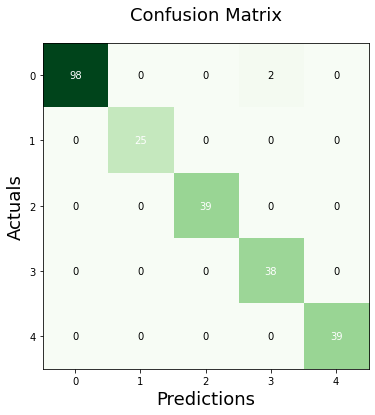

In [ ]:
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
fig, ax = plot_confusion_matrix(conf_mat=cm_dtc, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtc))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       100
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        39
           3       0.95      1.00      0.97        38
           4       1.00      1.00      1.00        39

    accuracy                           0.99       241
   macro avg       0.99      1.00      0.99       241
weighted avg       0.99      0.99      0.99       241



In [ ]:
-